<a href="https://colab.research.google.com/github/augustosma/antenas/blob/main/meep_antenna_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalação Meep

In [ ]:
#install miniconda
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...


--2020-12-02 15:02:21--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2020-12-02 15:02:21--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh.2’

     0K .......... .......... .......... .......... ..........  0% 47.1M 1s
    50K .......... .......... .......... .......... ..........  

In [ ]:
#update conda, but not python
#%%bash
!conda install --channel defaults conda python=3.6 --yes
!conda update --channel defaults --all --yes

#append
import sys
_ = (sys.path
        .append("/usr/local/lib/python3.6/site-packages"))

#install meep
!conda install --channel conda-forge pymeep --yes

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | 

Teste a instalação verificando se consegue importar a biblioteca

In [ ]:
import meep as mp

# Simulações

## Guia de Onda

-----------
Initializing structure...
time for choose_chunkdivision = 0.000166178 s
Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 10
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.0349801 s
-----------


FloatProgress(value=0.0, description='0% done ', max=200.0)

creating output file "./ez.h5"...
run 0 finished at t = 200.0 (4000 timesteps)


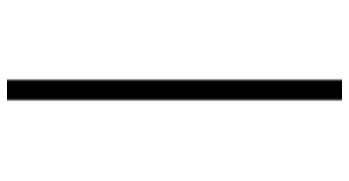

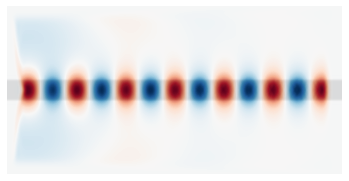

In [ ]:
# -*- coding: utf-8 -*-

# From the Meep tutorial: plotting permittivity and fields of a straight waveguide
from __future__ import division

import meep as mp

#simulation cell size of 16 x 8 um
cell = mp.Vector3(16,8,0)


geometry = [mp.Block(mp.Vector3(mp.inf,1,mp.inf),
                     center=mp.Vector3(),
                     material=mp.Medium(epsilon=12))]

sources = [mp.Source(mp.ContinuousSource(frequency=0.15),
                     component=mp.Ez,
                     center=mp.Vector3(-7,0))]



pml_layers = [mp.PML(1.0)]

resolution = 10

sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

#sim.run(until=200)
sim.run(mp.to_appended("ez", mp.at_every(0.5, mp.output_efield_z)),
        until=200)

import numpy as np
import matplotlib.pyplot as plt

eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
plt.axis('off')
plt.show()

In [ ]:
#convert simulation output to numpy array
import h5py
f = h5py.File('ez.h5', 'r')
efield_z = np.array(f.get('ez'))
f.close()

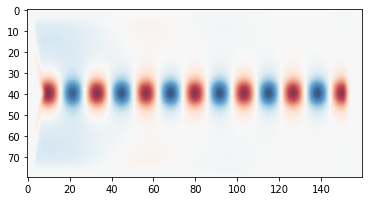

In [ ]:
#np.shape(efield_z[0,0,:])

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


#função plot dinamico no tempo
def func_din_plot (field_array): 
  """
  entrada é array 3D: E_x, E_y e tempo
  """
  fig = plt.figure()
  ims = []
  #im = plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
  #ims.append([im])
  for i in range(len(field_array[0,0,:])):    
    im = plt.imshow(field_array[:,:,i].transpose(), interpolation='spline36', cmap='RdBu', alpha=0.8)
    ims.append([im])

  anim = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
  #ani.save('dynamic_images.mp4')
  return anim

my_animation = func_din_plot(efield_z)
my_animation.save('dynamic_images.mp4')

#anim = animation.FuncAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

#plt.show()

#play video
from IPython.display import HTML
from base64 import b64encode

filename = "dynamic_images.mp4"
mp4 = open(filename,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
    <video controls>
        <source src="%s" type="video/mp4">
    </video>
  """%data_url)



# Dipolo

In [ ]:
# from https://github.com/pfabo/notebook-fdtd/blob/master/120_meep_dipole.ipynb

import meep as mp 
import numpy as np
import matplotlib.pyplot as plt

sim.restart_fields()

freq = 0.01
resolution = 2                            
area = mp.Vector3(200,200,0)          

dip = [mp.Block(mp.Vector3(1, 24),    
        center=mp.Vector3(0,12),
        material=mp.metal),

        mp.Block(mp.Vector3(1, 24),
        center=mp.Vector3(0,-12),
        material=mp.metal),

        mp.Block(mp.Vector3(1, 2),
        center=mp.Vector3(0, 0),
        material=mp.Medium( D_conductivity=0.05))
        ]

src = [mp.Source(mp.ContinuousSource(frequency=freq),
                 component=mp.Ey,
                 center=mp.Vector3(0, 0,0)),    
        ]

sim = mp.Simulation(cell_size=area, 
                    boundary_layers=[mp.PML(2.0)],
                    geometry=dip, 
                    sources=src, 
                    resolution=resolution)

sim.run(mp.to_appended("e_field", mp.at_every(2, mp.output_efield_y)),
        until=230)


-----------
Initializing structure...
time for choose_chunkdivision = 0.000219107 s
Working in 2D dimensions.
Computational cell is 200 x 200 x 0 with resolution 2
     block, center = (0,12,0)
          size (1,24,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     block, center = (0,-12,0)
          size (1,24,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
     block, center = (0,0,0)
          size (1,2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.287966 s
time for set_conductivity = 0.00716209 s
time for set_conductivity = 0.00722289 s
time for set_conductivity = 0.00728202 s
-----------


FloatProgress(value=0.0, description='0% done ', max=230.0)

creating output file "./e_field.h5"...
Meep progress: 178.0/230.0 = 77.4% done in 4.0s, 1.2s to go
on time step 712 (time=178), 0.0056263 s/step
run 0 finished at t = 230.0 (920 timesteps)


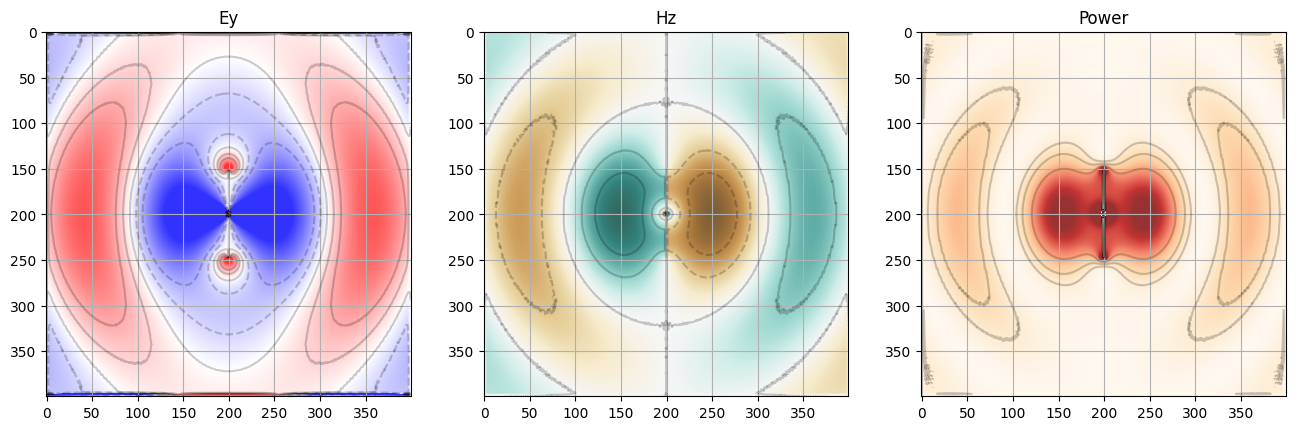

In [ ]:
eps = sim.get_array(center=mp.Vector3(), size=area, component=mp.Dielectric)

pw = sim.get_array(center=mp.Vector3(), size=area, component=mp.EnergyDensity)
ey = sim.get_array(center=mp.Vector3(), size=area, component=mp.Ey)
hz = sim.get_array(center=mp.Vector3(), size=area, component=mp.Hz)

fig = plt.figure(dpi=100, figsize=(16,8))
ax = fig.add_subplot(131)
ax.imshow(ey.transpose(), interpolation='spline36', cmap='bwr', alpha=1.0,norm=plt.Normalize(-0.05, 0.05))
ax.contour(ey.transpose(), levels=[-0.02, -0.01, 0.0, 0.01, 0.02], colors="k", alpha=0.2)
ax.imshow(eps.transpose(), interpolation='spline36', cmap='gray', alpha=0.2)
ax.grid()
ax.set_title('Ey')

ax = fig.add_subplot(132)
ax.imshow(hz.transpose(), interpolation='spline36', cmap='BrBG', alpha=1.0, norm=plt.Normalize(-0.07, 0.07))
ax.imshow(eps.transpose(), interpolation='spline36', cmap='gray', alpha=0.2)
ax.contour(hz.transpose(), levels=[-0.05, -0.03, 0.0, 0.03, 0.05], colors="k", alpha=0.2)
ax.set_title('Hz')
ax.grid()

ax = fig.add_subplot(133)
ax.imshow(pw.transpose(), interpolation='spline36', cmap='OrRd', alpha=1.0,norm=plt.Normalize(-0.000, 0.004))
ax.imshow(eps.transpose(), interpolation='spline36', cmap='gray', alpha=0.2)
plt.contour(pw.transpose(), levels=[0.0005, 0.001, 0.002], colors="k", alpha=0.2)
ax.grid()
ax.set_title('Power')
plt.show()

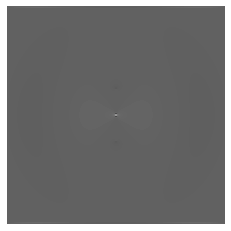

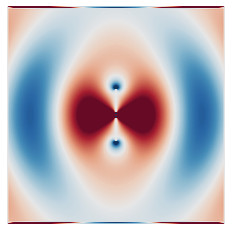

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

eps_data = sim.get_array(center=mp.Vector3(), size=area, component=mp.Metallic)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

ey_data = sim.get_array(center=mp.Vector3(), size=area, component=mp.Ey)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ey_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9, norm=plt.Normalize(-0.05, 0.05))
plt.axis('off')
plt.show()

In [ ]:
#convert simulation output to numpy array
import h5py
f = h5py.File('e_field.h5', 'r')
efield_y = np.array(f.get('ey'))
f.close()

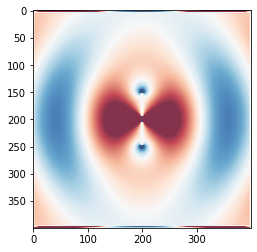

In [ ]:
filename = "dynamic_dipole.mp4"


fig = plt.figure()
ims = []
#im = plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
#ims.append([im])
for i in range(len(efield_y[0,0,:])):    
  im = plt.imshow(efield_y[:,:,i].transpose(), interpolation='spline36', cmap='RdBu', alpha=0.8,norm=plt.Normalize(-0.05, 0.05))
  ims.append([im])

anim = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
anim.save(filename)


#anim = animation.FuncAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])


#plt.show()

#play video
from IPython.display import HTML
from base64 import b64encode

#filename = "dynamic_images.mp4"
mp4 = open(filename,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
    <video controls>
        <source src="%s" type="video/mp4">
    </video>
  """%data_url)